In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

In [2]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [392]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100000;", conn_r)
        conn_r.commit()
        conn_r.close()

In [393]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [394]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.499987500312492,0.222219753113854,0.66664444518516,0.285710204139941,0.571420408279882,0.235292733572155,0.0,0.0,10.0,12.0,...,0.30755352973938,16.4827845394611,1.96576374769211,-15.1882271617651,5.91857450455427,-0.617341477423906,-22.9377314597368,8.57973027229309,3.64673975110054,3.98883837461472
2,0.714275510349852,0.555549382784636,0.999985714489793,0.999985714489793,0.749995312529297,0.749995312529297,1.0,1.0,0.0,16.0,...,18.536908660084,10.8472666554153,9.50527470232919,-4.52742426842451,-8.82688320241869,5.58420560881496,-11.9603347145021,10.9440006799996,5.22782422974706,2.77192507684231
3,0.999966667777741,0.999966667777741,0.999900009999,0.999900009999,0.999975000624984,0.999975000624984,1.0,1.0,0.0,4.0,...,17.7861597537994,2.33489120006561,5.80631280131638,5.52346836030483,13.2366973161697,0.0756195783615112,-7.8935911655426,0.963605642318726,11.4590103626251,-2.0791107416153
4,0.599994000059999,0.499995833368055,0.699993000069999,0.499996428596939,0.541664409731626,0.419353485956497,0.0,0.0,7.0,27.5,...,6.80147449858487,5.83862610906363,10.1878469735384,-9.23549959808588,24.6420464254916,31.1234612613916,-8.63692628592253,32.1564684361219,7.85223335772753,11.5201828107238
5,0.14285510206997,0.0769224852116522,0.249993750156246,0.166663888935184,0.166665277789352,0.0869561436689406,0.0,0.0,11.0,17.5,...,-8.31425130367279,-2.01689046248794,-21.8583025187254,-24.1715326923877,14.7867769747973,-0.532542616128922,-27.6983191668987,38.4657829105854,-2.69293901324272,6.62539822608233


<h2> 4.2 Converting strings to numerics </h2>

In [395]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [396]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

<h2> 4.3 Random train test split( 70:30) </h2>

In [397]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [398]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (69999, 794)
Number of data points in test data : (30000, 794)


In [399]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.629123273189617 Class 1:  0.37087672681038303
---------- Distribution of output variable in train data ----------
Class 0:  0.3709 Class 1:  0.3709


In [2]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [75]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [116]:
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [117]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [118]:
y_true = df['is_duplicate']
y_true = list(map(int, y_true.values))

In [119]:
df1  = df1.merge(df2, on='id',how='left')
df1.head(2)

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,...,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,...,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [120]:
df1.drop(['id','is_duplicate'], axis=1, inplace=True)
df1.head(2)

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,...,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,...,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [91]:
X_train_dense,X_test_dense = train_test_split(df1,test_size=0.3)

In [121]:
X_train,X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.3)

# Featurizing text data with tfidf vectorizer

In [327]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

questions = list(X_train['question1']) + list(X_train['question2'])

tfidf = TfidfVectorizer(lowercase=False).fit(questions)
question1_spare = tfidf.transform(X_train['question1'])
question2_spare = tfidf.transform(X_train['question2'])

In [328]:
question1_spare.shape

(283003, 93205)

In [329]:
from scipy import sparse

sparse.save_npz("question1_spare_train.npz", question1_spare)
sparse.save_npz("question2_spare_train.npz", question2_spare)

In [330]:
question1_spare = tfidf.transform(X_test['question1'])
question2_spare = tfidf.transform(X_test['question2'])

In [331]:
sparse.save_npz("question1_spare_test.npz", question1_spare)
sparse.save_npz("question2_spare_test.npz", question2_spare)

In [83]:
from scipy import sparse

question1_spare_train = sparse.load_npz("question1_spare_train.npz")
question2_spare_train = sparse.load_npz("question2_spare_train.npz")
question1_spare_test = sparse.load_npz("question1_spare_test.npz")
question2_spare_test = sparse.load_npz("question2_spare_test.npz")

In [84]:
question1_spare_train

<283003x93205 sparse matrix of type '<class 'numpy.float64'>'
	with 2832892 stored elements in Compressed Sparse Row format>

In [85]:
from scipy.sparse import coo_matrix,vstack,hstack

x_train_spare = hstack([question1_spare_train,question2_spare_train])
x_test_spare = hstack([question1_spare_test,question2_spare_test])

In [87]:
print(x_train_spare.shape)
print(x_test_spare.shape)

(283003, 186410)
(121287, 186410)


In [88]:
X_train = hstack([x_train_spare,X_train_dense])
X_test = hstack([x_test_spare,X_test_dense])

In [89]:
X_train.shape

(283003, 186436)

# Logistic Regression with hyperparameter tuning

For values of alpha =  1e-08 The log loss is: 0.6584131031255376
For values of alpha =  1e-07 The log loss is: 0.45118649641196046
For values of alpha =  1e-06 The log loss is: 0.44127792578877456
For values of alpha =  1e-05 The log loss is: 0.43702086553819147
For values of alpha =  0.0001 The log loss is: 0.43610202165468176
For values of alpha =  0.001 The log loss is: 0.436020946867788
For values of alpha =  0.01 The log loss is: 0.4351969649219146
For values of alpha =  0.1 The log loss is: 0.4495026942136337
For values of alpha =  1 The log loss is: 0.48937899934316587
For values of alpha =  10 The log loss is: 0.5482232992731347
For values of alpha =  100 The log loss is: 0.5901194264713301


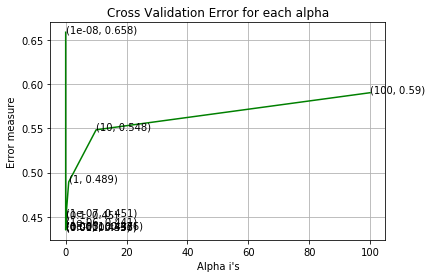

For values of best alpha =  0.01 The train log loss is: 0.43453116309505774
For values of best alpha =  0.01 The test log loss is: 0.4351969649219146
Total number of data points : 121287


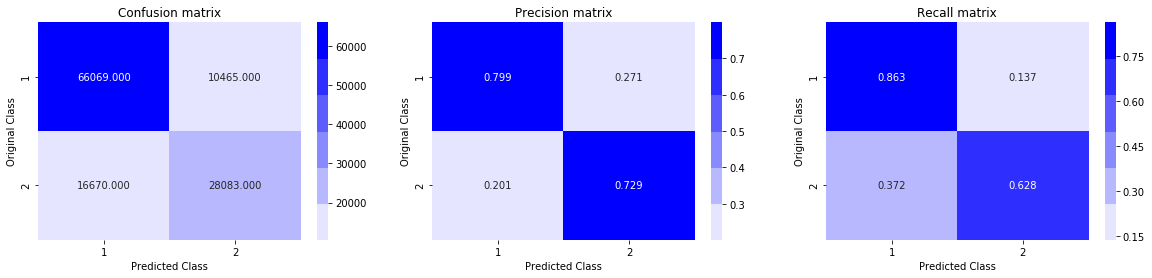

In [122]:
alpha = [10 ** x for x in range(-8, 3)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.453817545218918
For values of alpha =  0.0001 The log loss is: 0.47573369381033
For values of alpha =  0.001 The log loss is: 0.5020954914651199
For values of alpha =  0.01 The log loss is: 0.5163913646455223
For values of alpha =  0.1 The log loss is: 0.5023231418673776
For values of alpha =  1 The log loss is: 0.5683535716019726
For values of alpha =  10 The log loss is: 0.6109532164353711


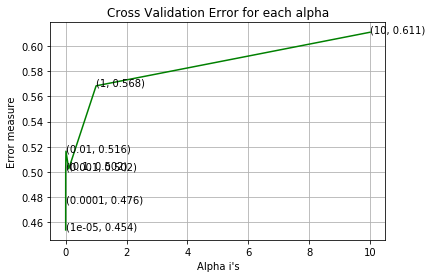

For values of best alpha =  1e-05 The train log loss is: 0.4528610091277082
For values of best alpha =  1e-05 The test log loss is: 0.453817545218918
Total number of data points : 121287


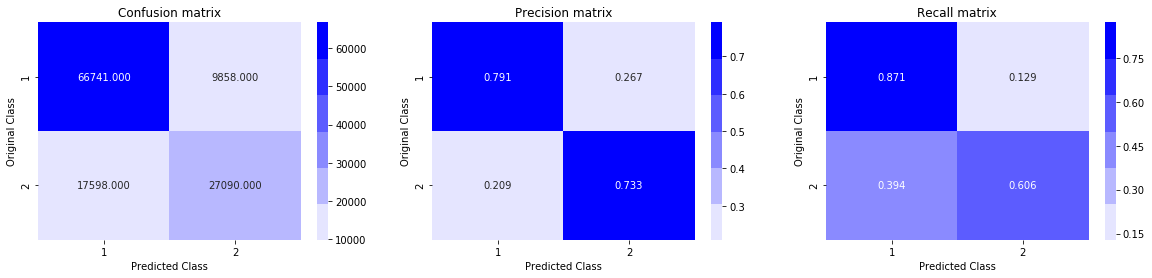

In [299]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Featurizing text data with TF-IDF word2vecFeaturizing text data with 

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(X_train['question1']) + list(X_train['question2'])

tfidf = TfidfVectorizer(lowercase=False,max_features = 10000)
df1 = tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [40]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
from tqdm import tqdm
import spacy

nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in list(X_train['question1']):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_train['q1_feats_m'] = list(vecs1)

In [41]:
vecs2 = []
for qu2 in list(X_train['question2']):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_train['q2_feats_m'] = list(vecs2)

In [42]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in list(X_test['question1']):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_test['q1_feats_m'] = list(vecs1)

In [43]:
vecs2 = []
for qu2 in list(X_test['question2']):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_test['q2_feats_m'] = list(vecs2)

In [44]:
X_train = X_train.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3_q1_train = pd.DataFrame(X_train.q1_feats_m.values.tolist(), index= X_train.index)
df3_q2_train = pd.DataFrame(X_train.q2_feats_m.values.tolist(), index= X_train.index)

In [45]:
X_test = X_test.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3_q1_test = pd.DataFrame(X_test.q1_feats_m.values.tolist(), index= X_test.index)
df3_q2_test = pd.DataFrame(X_test.q2_feats_m.values.tolist(), index= X_test.index)

In [51]:
df3_q1_train.to_csv("df3_q1_train.csv")
df3_q2_train.to_csv("df3_q2_train.csv")

In [52]:
df3_q1_test.to_csv("df3_q1_test.csv")
df3_q2_test.to_csv("df3_q2_test.csv")

In [3]:
df3_q1_train = pd.read_csv("df3_q1_train.csv") 
df3_q2_train = pd.read_csv("df3_q2_train.csv") 
df3_q1_test = pd.read_csv("df3_q1_test.csv") 
df3_q2_test = pd.read_csv("df3_q2_test.csv") 

In [18]:
df3_q1_train = df3_q1_train.head(70000)
df3_q2_train = df3_q2_train.head(70000)
df3_q1_test = df3_q1_test.head(30000)
df3_q2_test = df3_q2_test.head(30000)

In [19]:
X_train_dense = X_train_dense.head(70000)
X_test_dense = X_test_dense.head(70000)
df3_q1_train['id']=X_train_dense['id']
df3_q2_train['id']=X_train_dense['id']

In [37]:
X_train_final = pd.concat([df3_q1_train, df3_q2_train], ignore_index=True,axis= 1)

In [ ]:
df3_q1_test['id']=X_test_dense['id']
df3_q2_test['id']=X_test_dense['id']

In [28]:
df3_q1_test_1 = df3_q1_test.head(15000)
df3_q1_test_2 = df3_q1_test.tail(15000)
df3_q2_test_1 = df3_q2_test.head(15000)
df3_q2_test_2 = df3_q2_test.tail(15000)

In [31]:
X_test_final_1 = pd.concat([df3_q1_test_1, df3_q2_test_1], ignore_index=True,axis=1)

In [34]:
X_test_final_2 = pd.concat([df3_q1_test_2, df3_q2_test_2], ignore_index=True,axis=1)

In [35]:
X_test_final = pd.concat([X_test_final_1,X_test_final_2])

In [40]:
X_train_final.to_pickle("X_train_final.csv")

In [41]:
X_test_final.to_pickle("X_test_final.csv")

In [62]:
y_train = y_Train['is_duplicate']
y_train = list(map(int, y_train.values))

In [67]:
y_test = y_Test['is_duplicate']
y_test = list(map(int, y_test.values))

<h2> 4.6 XGBoost with hyperparameter tuning </h2>

C:\Users\U6069188\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


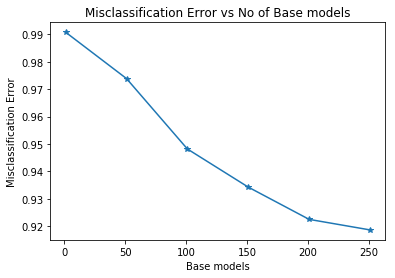

Time taken : 0:49:56.144002


In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from datetime import datetime
import xgboost as xgb

start = datetime.now()
params_Rand= {'n_estimators' : list(np.arange(1,300,50))}

model_rand = RandomizedSearchCV(xgb.XGBClassifier(max_depth = 4),param_distributions = params_Rand,scoring = 'f1', cv=3)

model_rand.fit(X_train, y_train)

mean_test_scores = model_rand.cv_results_['mean_test_score']
MSE = [1 - x for x in mean_test_scores]
    
# plot misclassification error vs depth
plt.plot(params_Rand['n_estimators'], MSE, marker = '*') 

plt.title("Misclassification Error vs No of Base models")
plt.xlabel('Base models')
plt.ylabel('Misclassification Error')
plt.show()

print('Time taken :', datetime.now() - start)

In [149]:
predict_y = model_rand.predict(X_test)
print("The test log loss is:",log_loss(y_test, predict_y,labels=clf.classes_, eps=1e-15))

The test log loss is: 0.388765589


Total number of data points : 30000


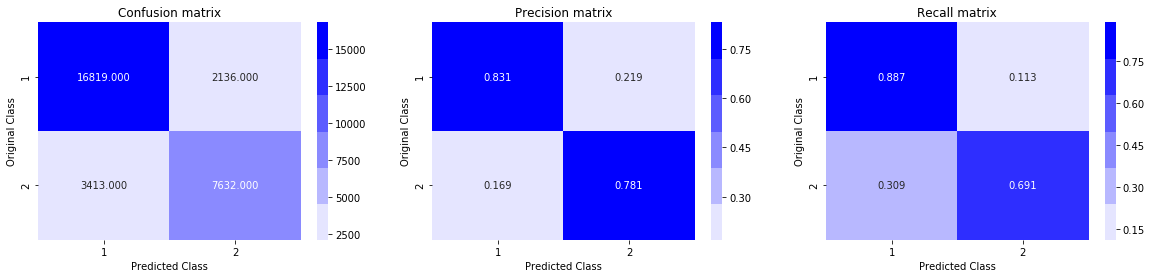

In [147]:
y =np.array(y>0.5,dtype=int)
print("Total number of data points :", len(y))
plot_confusion_matrix(y_test, y)

Observations:
1. The best model is XGB using the Tfidf W2V features after hyper paramenter tuning with test loss of 0.388765589.
2. The best model between logistic regression and SVM with hyperparameter tuning using tfidf vectorizer is logistic regression with test loss 0.43440517240069526.
3. We could see that the test log loss is improved for all the models.

In [151]:
from prettytable import PrettyTable
    
y = PrettyTable()

In [152]:
y.field_names = ["Model", "Hyperparameters","Test Error"]

In [153]:
y.add_row(["XGBoost using tfidfW2V","Base Models - 250", 0.388765589])
y.add_row(["Logistic Regression using Tfidf","Alpha - 0.001", 0.43440517240069526])
y.add_row(["SVM using Tfidf","Alphs - 1e-05", 0.453817545218918])

In [154]:
print(y)

+---------------------------------+-------------------+---------------------+
|              Model              |  Hyperparameters  |      Test Error     |
+---------------------------------+-------------------+---------------------+
|      XGBoost using tfidfW2V     | Base Models - 250 |     0.388765589     |
| Logistic Regression using Tfidf |   Alpha - 0.001   | 0.43440517240069526 |
|         SVM using Tfidf         |   Alphs - 1e-05   |  0.453817545218918  |
+---------------------------------+-------------------+---------------------+
